# **Rapport : Quantitative Structure-Activity Relationship**

## **1.a - Réprésentation des données : Analyse des attributs**

In [83]:
# Importation des librairies basiques
import pandas as pd
import numpy as np

# Paramètres d'affichage des DataFrames
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# librairies de visualisation
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

# Librairie sklearn
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Retirer les Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Modèle gaussien
from matplotlib import patches
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

In [84]:
# Lecture des données du xlsx
data_file = "../Datasets/QSAR_dataset.xlsx"
# Stockage des données dans un dataframe
data = pd.read_excel(data_file,index_col=0)
# Affichage de la taille pour avoir une idée de la quantité de données/attributs
print(f"Le dataset QSAR, sans modification quelconque, possède {data.shape[1]} attributs et {data.shape[0]} données.")

Le dataset QSAR, sans modification quelconque, possède 75 attributs et 154 données.


##### **1.a.1. Analyse des critères statistiques des attributs avant prétraitrement**

In [85]:
# Statistiques descriptives des attributs
data.describe()

,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,a_nF,a_nH,balabanJ,bpol,CASA+,CASA-,chi0,chi0v,chi0v_C,chi0_C,chi1,chi1v,chi1v_C,chi1_C,DASA,DCASA,dens,density,diameter,dipole,h_logP,h_logS,logP(o/w),logS,mr,npr2,PC+,PC-,PEOE_VSA_NEG,PEOE_VSA_PNEG,PEOE_VSA_POL,PEOE_VSA_PPOS,petitjean,petitjeanSC,pmi,pmi2,pmi3,radius,rgyr,RPC-,rsynth,SlogP,SMR,std_dim1,std_dim2,std_dim3,TPSA,VAdjEq,VAdjMa,VDistEq,VDistMa,vdw_area,vdw_vol,vol,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
count,154.000000,152.000000,153.000000,154.000000,154.000000,153.000000,154.000000,153.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,1.470000e+02,141.000000,136.000000,154.000000,154.000000
mean,34.610698,105.781739,359.928668,23.909091,0.292208,18.875817,17.350649,33.912102,11.649351,3.110390,2.571429,5.038961,2.714214,12.106199,219.625677,1107.378109,14.303269,12.198969,6.255169,7.238880,8.665561,6.612845,3.451360,4.660407,266.639368,921.074073,1.431223,1.094136,8.636364,1.589164,6.309915,-6.398987,6.412761,-6.898967,6.975075,0.852083,2.537487,-2.784312,208.924678,9.755466,15.080398,5.324932,0.438692,0.797642,5145.701918,4292.409483,4832.377483,4.785714,3.554500,0.149592,0.234911,5.785759,7.231751,2.887565,1.411958,0.703366,15.801558,0.524767,5.264981,2.825820,8.094493,259.668901,144.081974,246.203734,273.307303,8.076532,239.944812,9.086768,2.379611,-6.802721e+08,-66.497364,-2.501405,359.813016,101.350649
std,5.951534,62.391286,111.225998,4.895461,0.862625,5.596428,5.028718,9.714722,2.472152,2.954031,6.335765,3.838033,1.710695,7.573657,206.638085,1246.362768,5.194629,3.087648,1.447586,1.873913,2.115781,1.501245,1.047979,1.683055,144.691041,1232.204660,0.347068,0.294912,1.729476,2.159977,1.943933,1.625585,1.922318,2.044863,1.603270,0.111952,2.062802,2.355922,59.180178,15.463769,24.734093,10.188526,0.057631,0.160078,3385.386067,3112.597016,3159.418007,0.766661,0.610114,0.078984,0.341899,1.940097,1.668464,0.546035,0.254090,0.460910,20.695163,0.095753,0.346538,0.293186,0.777729,58.299787,13.843568,48.217762,52.783753,14.721655,59.915749,15.129738,2.637952,8.247861e+09,73.647379,2.807324,132.955027,33.487395
min,17.148172,8.778115,122.917570,12.000000,0.000000,10.000000,6.000000,12.000000,6.000000,0.000000,0.000000,0.000000,1.464454,2.520000,39.416298,170.115160,6.811555,5.003862,3.000000,3.000000,4.698377,2.668598,1.250000,1.250000,0.030300,0.045450,0.873103,0.620973,5.000000,0.000150,0.018347,-12.304079,-0.726000,-14.071490,2.991871,0.500026,1.062000,-10.980000,69.183167,0.000000,0.000000,0.000000,0.200000,0.250000,568.416630,408.216950,568.416630,3.000000,2.105879,0.081967,0.000000,0.189200,3.073050,1.508722,0.983466,0.000231,0.000000,0.266657,4.321928,2.107732,6.305622,131.061520,112.240073,116.250000,140.102050,0.000000,67.651054,0.000000,0.011998,-1.000000e+11,-209.769584,-8.247237,128.174000,46.000000
25%,31.534723,70.909811,330.864750,22.000000,0.000000,17.000000,16.000000,30.541887,12.000000,0.000000,0.000000,3.000000,1.906260,6.892828,117.247280,539.355285,11.949383,10.393762,6.096688,7.057960,7.958635,5.944405,3.236538,4.037457,204.843430,378.222350,1.228762,0.917542,8.000000,0.207287,5.344490,-7.359139,5.582320,-8.217000,5.737753,0.797710,1.512000,-2.512000,176.738710,0.000000,0.000000,0.000000,0.444444,0.800000,3294.154200,2509.562575,2980.993750,4.250000,3.242875,0.105173,0.000000,4.321315

In [86]:
# Types des attributs
data.dtypes

Class             object
apol             float64
ASA+             float64
ASA-             float64
a_count            int64
a_donacc           int64
a_heavy          float64
a_hyd              int64
a_IC             float64
a_nC               int64
a_nCl              int64
a_nF               int64
a_nH               int64
balabanJ         float64
bpol             float64
CASA+            float64
CASA-            float64
chi0             float64
chi0v            float64
chi0v_C          float64
chi0_C           float64
chi1             float64
chi1v            float64
chi1v_C          float64
chi1_C           float64
DASA             float64
DCASA            float64
dens             float64
density          float64
diameter           int64
dipole           float64
h_logP           float64
h_logS           float64
logP(o/w)        float64
logS             float64
mr               float64
npr2             float64
PC+              float64
PC-              float64
PEOE_VSA_NEG     float64


In [87]:
# Compte des types d'attributs
data.dtypes.value_counts()

float64    64
int64      10
object      1
Name: count, dtype: int64

##### **1.a.2. Prétraitement des données**

**Traitement des valeurs dupliquées** \
Avant de commencer tout prétraitement, nous avons procédé à la suppression des données dupliquées.

In [88]:
# Suppression d'objets dupliqués
data = data.drop_duplicates()
data.duplicated().sum()
print(f"Le dataset QSAR, sans données dupliquées, possède finalement {data.shape[1]} attributs et {data.shape[0]} données.")

Le dataset QSAR, sans données dupliquées, possède finalement 75 attributs et 132 données.


**Normalisation ?**\
Une normalisation mènera à l'égalisation de chaque attribut, ce que nous souhaitons pas, dans cette première partie d'analyse et de compréhension des données. Si cela est nécessaire par la suite, pour par exemple l'application de certains algorithme, nous procèderons à celle-ci.

**Traitement des valeurs aberrantes** \
Nous avons décidé de traiter les valeurs aberrantes avant de procéder à l'imputation. L'imputation se fera à partir d'un modèle construit sur les données, elles doivent donc être nettoyées avant.

In [89]:
# Nous allons utiliser plusieurs des subplots pour l'affichage des boxplots
fig = make_subplots(rows=15, cols=5)
all_attributes = list(data.columns)
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, 79)]
# Index qu'on utilisera pour s'assurer qu'on ne sera pas or index
ind = 0

for row in range(1,16):
    for col in range(1,6):
        fig.add_trace(go.Box(
            y=data[all_attributes[ind]],
            name=all_attributes[ind],
            jitter=0.5,
            whiskerwidth=0.2,
            marker_color=c[ind],
            line_width=1),
            row =row,col=col
            )
        ind += 1
        if ind == 79:
            break

fig.update_layout(height=3000, width=1200, title_text="Boxplot des 75 attributs")
fig.show()

Il serait maintenant intéressant d'avoir les taux de valeurs aberrantes par attribut. Si l'on remarque une proportion trop élevée de valeurs aberrantes pour un attribut, il sera envisagé de le supprimer. Sachant que nous ignorerons les valeurs aberrantes comprises dans les attributs correspondants à la classe, puisque c'est l'attribut cible.

In [90]:
data_no_class = data.drop(columns=["Class"])

In [91]:
# Fonction retournant le nombre de valeurs aberrantes pour un attribut
def count_outliers_rate(attribute):
    Q1 = data[attribute].quantile(q = 0.25)
    Q3 = data[attribute].quantile(q = 0.75)
    IQR = Q3 - Q1
    # Limites de l'intervalle
    high_outlier,low_outlier = Q3+1.5*IQR,Q1-1.5*IQR
    # Récupération des valeurs aberrantes
    outliers = data[(data[attribute] > high_outlier) | (data[attribute] < low_outlier)]
    return (outliers.shape[0] / data.shape[0])*100

In [92]:
# Obtention du nombre de valeurs aberrantes par attribut
rate_of_outliers = []
for attribute in list(data_no_class.columns):
    r = count_outliers_rate(attribute)
    rate_of_outliers.append(r)

In [93]:
colors_rate_outliers = []
# Liste pour l'affichage en couleur du graphe suivant
for k in rate_of_outliers:
    if k <= 5 :
        colors_rate_outliers.append('#B6E2A1')
    elif k >= 15 :
        colors_rate_outliers.append('crimson')
    else : 
        colors_rate_outliers.append('rgb(158,202,225)')

In [94]:
# Affichage de la proportion des valeurs aberrantes en différentes couleurs
fig = go.Figure([go.Bar(x=list(data_no_class.columns), y=rate_of_outliers,text=rate_of_outliers, marker_color=colors_rate_outliers)])
fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6,texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(yaxis=dict(title='Pourcentage de valeurs aberrantes'),
                  xaxis=dict(title="Attributs"),title_text='Nombre de valeurs aberrantes par attribut (sans les attributs de classe)')
fig.show()

On peut voir d'après le graphe précédent, en rouge les attributs dont la proportion de valeur aberrante dépasse les 15%, et en vert ceux dont ce pourcentage est inférieur à 5%. On remarque que la proportion de valeurs aberrantes est très élevée dans les données, ce qui nous a poussés à les conserver. Elles pourraient avoir une signification qui nous ait inconnue.

**Traitement des données manquantes**

*Pour alléger la rédaction, nous avons décidé de surnommer les attributs aux données manquantes les ADM.*

In [95]:
# Détermination du type, du nombre et du pourcentage de valeurs manquantes par attribut, sans compter la classe, sur toutes les mesures
nb_m = data_no_class.isnull().sum().sort_values()
ratio_m = ((data_no_class.isnull().sum()/data_no_class.shape[0]).sort_values())*100

In [96]:
manquant = pd.concat([nb_m, ratio_m], axis=1, sort=False)

In [97]:
# Affichage de ces données
df_manquants = pd.DataFrame({'Types': data_no_class[list(manquant.index.values)].dtypes,
                             'Nb manquants': nb_m,
                             '% de manquants': ratio_m,})
# On ne se concentre que sur les attributs aux valeurs manquantes
df_ADM = df_manquants[df_manquants["Nb manquants"]>0]
df_ADM

,Types,Nb manquants,% de manquants
a_heavy,float64,1,0.757576
ASA-,float64,1,0.757576
a_IC,float64,1,0.757576
ASA+,float64,2,1.515152
vsurf_R,float64,7,5.303030
vsurf_S,float64,12,9.090909
vsurf_V,float64,16,12.121212


In [98]:
nb_manquants = df_ADM["Nb manquants"].sum()
nb_mesures = data_no_class.shape[0]*data_no_class.shape[1]

ratio = round((nb_manquants / nb_mesures), 3) * 100

print("On a au total", nb_manquants, "mesures manquantes dans nos données, soit une proportion de :", ratio, '% sur toutes les mesures.')

On a au total 40 mesures manquantes dans nos données, soit une proportion de : 0.4 % sur toutes les mesures.


Nous avons décidé de procéder au traitement des données manquantes par imputation, au lieu de simplement les supprimer. Le dataset QSAR ne possède pas beaucoup de données, et supprimer celles que nous possédons pourrait amener à une modélisation/classification incorrecte.

Tout d'abord, on observe que tous les attributs manquants sont numériques. De plus, on remarque que la proportion de données manquantes est différente pour chaque attribut, on n'est donc pas dans le cas du MMCA (Données manquantes de Manière Complètement Aléatoire)<sup>**1**</sup>. On considère que nos données sont dans le cas MA (Manquantes Aléatoirement), car c'est la situation la plus courante<sup>**2**</sup>, même s'il est en réalité difficile de différencier ces deux cas sans une vision experte de la représentation de ces données. Pour traiter les données MA il y a deux possibilités qui s'offrent à nous<sup>**3**</sup> :
- Imputation par régression linéaire
- Imputation multiple (On choisit kNN car c'est un algorithme qu'on a étudié en cours)

Nous avons choisi d'opter pour l'imputation kNN, car celle-ci peut effectuer une imputation sans rencontrer d'erreurs en présence de valeurs manquantes dans le dataset.

In [99]:
# Liste des attributs avec des données manquantes
missing_attributes = ["a_IC","a_heavy","ASA-","ASA+","vsurf_R","vsurf_S","vsurf_V"]

**Imputation KNN** 


Pour l'imputation multiple, nous allons procéder à une imputation kNN avec KNNImputer<sup>**4**</sup>  de la librairie scikit-learn. Il n'y a pas besoin, lors de l'imputation d'une valeur manquante, de retirer les autres ADM : le kNN Imputer, fonctionnant sur l'algorithme du plus proche voisin, détermine la proximité entre deux points qu'à travers les attributs "complets" (sans valeurs manquantes). 

*Nombre de voisins k* \
Le nombre de voisins ne peut pas être déterminé par une évaluation des résultats après l'imputation, puisqu'il n'y a pas de données auxquelles on peut comparer les résultats obtenus. 
Nous avons donc choisi, de manière arbitraire k = $\sqrt{Nombre De Lignes}$, soit k = $\sqrt{132}$ ≈ 11 

*La métrique*  \
En ce qui concerne la métrique<sup>**5**</sup> :
- Nous n'avons pas choisi la distance de Manhattan, car elle suppose que toutes les unités sont comparables, alors qu'on a par exemple les attributs "Weights', "Density", "Diameter", qui sont certainement d'unités différentes ;
- Ni la distance cosinusoïdale, car il suppose que toutes les caractéristiques sont d'égales importance.
Comme pour le nombre de voisins, sans moyen concret d'évaluer la meilleure métrique, nous avons décidé d'opter pour la distance euclidienne.

In [100]:
def kNNimputation(data):
    # Imputation kNN, avec pour poids la distance des points
    imputer = KNNImputer(n_neighbors=11,weights="distance",metric="nan_euclidean")
    imputed = imputer.fit_transform(data)
    data_kNNimputed = pd.DataFrame(imputed, columns=data.columns)
    # Retourne le dataframe remplie
    return data_kNNimputed
            

In [101]:
# On procède à l'imputation qui ne fonctionne pas avec des attributs non numériques
# d'où le choix de data_no_class pour l'effectuer
df_clean = kNNimputation(data_no_class)

In [102]:
# Vérification du nombre de valeurs aberrantes
nb_m = df_clean.isnull().sum().sort_values()
ratio_m = (df_clean.isnull().sum()/data_no_class.shape[0]).sort_values()
print(f"Vérification du nombre de valeurs manquantes après imputation : {nb_m.sum()}")


Vérification du nombre de valeurs manquantes après imputation : 0


**Sauvegarde des données nettoyées obtenues**

In [103]:
# On récupère la colonne classe
df_clean = df_clean.assign(Class=data["Class"].values)
# ====== Mise en commentaire pour éviter la création d'un fichier à chaque exécution
# df_clean.to_excel("../Datasets/clean_QSAR_dataset.xlsx")  
# =======

##### **1.a.3. Sélection des 10 meilleurs attributs**

In [104]:
# Import des données nettoyées
data_file = "../Datasets/clean_QSAR_dataset.xlsx"
# Stockage des données dans un dataframe, on modifie la valeur de notre dataset de bas, "data"
data = pd.read_excel(data_file,index_col=0)
data_no_class = data.drop(columns=["Class"])

Afin de déterminer les 10 meilleurs attributs, nous utilisons la méthode "Select K Best", qui utilise des mesures statistiques pour classer les attributs.
La méthode SlectKBest de la librairie sklearn possède deux attributs<sup>**6**</sup>:
- K : le nombre de meilleurs attributs que l'on souhaite choisir
- score_func : la fonction utilisée pour évaluer les attributs

**Choix de score_func** \
Nous utilisons SelectKBest dans un but de classification, on a donc les possibilités suivantes pour score_func : 
- chi_2 : *Plus pratique dans le cas d'attributs non numériques*
- mutual_info_classif : *Fonctionne avec des datasets aux attributs numériques ou non. Détermine la quantité d'informations partagée entre les attributs et l'attribut cible. Les attributs aux plus hauts scores sont ceux fournissant le plus d'informations sur l'attribut cible.*
- f_classif : *Basé sur l'analyse de la variance (ANOVA), mesure la dépendance linéaire entre deux variables. Les attributs aux plus hauts score sont ceux dépendant de l'attribut cible.* 

D'après les informations précédentes, notre choix s'est porté sur mutual_info_classif, car nous ne voulons pas les meilleurs attributs qui dépendent de l'attribut "Class", mais ceux qui permettent d'avoir plus d'information sur ce dernier.

In [105]:
selector = SelectKBest(mutual_info_classif, k=10)
y = data["Class"]
selector.fit_transform(data_no_class, y)

array([[  1.5986819 ,  10.113732  ,  -9.3698997 , ...,   7.0426002 ,
        399.21936   , 357.37701   ],
       [  0.63803971,   2.9311595 ,  -3.2627599 , ...,   4.3948002 ,
        136.57939   , 130.88504   ],
       [  1.236138  ,  10.476893  , -11.15416   , ...,  10.1978    ,
        345.43402   , 345.43402   ],
       ...,
       [  0.94905031,   6.3414574 ,  -6.7484198 , ...,   7.1918001 ,
        239.94559   , 235.67482   ],
       [  0.65310049,   4.0384159 ,  -5.1406398 , ...,   6.1454    ,
        174.03706   , 166.9191    ],
       [  1.0050656 ,   6.0084519 ,  -7.6140499 , ...,   7.3759999 ,
        226.32581   , 204.05783   ]])

*selector* contient les valeurs des attributs sélectionnés, il faut donc les comparer au dataset pour obtenir le nom des 10 meilleurs attributs.

In [106]:
# Tableau des index des attributs sélectionnés
selected_attributes_index = selector.get_support(indices=True)
# selection des données correspondant à celles des 10 meilleurs attributs
df_BA = data.iloc[:,selected_attributes_index]
best_attribute = list(df_BA.columns)
print(f"Les 10 meilleurs attributs sont : {best_attribute}")

Les 10 meilleurs attributs sont : ['density', 'h_logP', 'logS', 'mr', 'PC+', 'PC-', 'SlogP', 'SMR', 'vdw_area', 'vsa_hyd']


Voici la signification de ces attributs :
- **density** : Densité de la masse moalire
- **h_logP** : Logarithme de la lipophilie holographique
- **logS** : Logarithme de la solubilité aqueuse
- **mr** : Réfraction moléculaire, calculée à partir d'un modèle linéaire [MREF 1998]
- **PC+** : Total de la charge partielle positive
- **PC-** : Total de la charge partielle négative
- **SlogP** : Logarithme du coeffecient de répartion eau/octanol (appelée lipophilie)
- **SMR** : Réfraction moléculaire, calculée à partir d'une contribution atomique [Crippen 1999]
- **std_dim1** : Dimension standard 1 : racine carrée de la plus grande valeur propre de la matrice de covariance des coordonnées atomiques. 
- **vdw_area** : Zone de la surface de Van der Waals

##### **1.a.4. Visualisation des 10 meilleurs attributs**

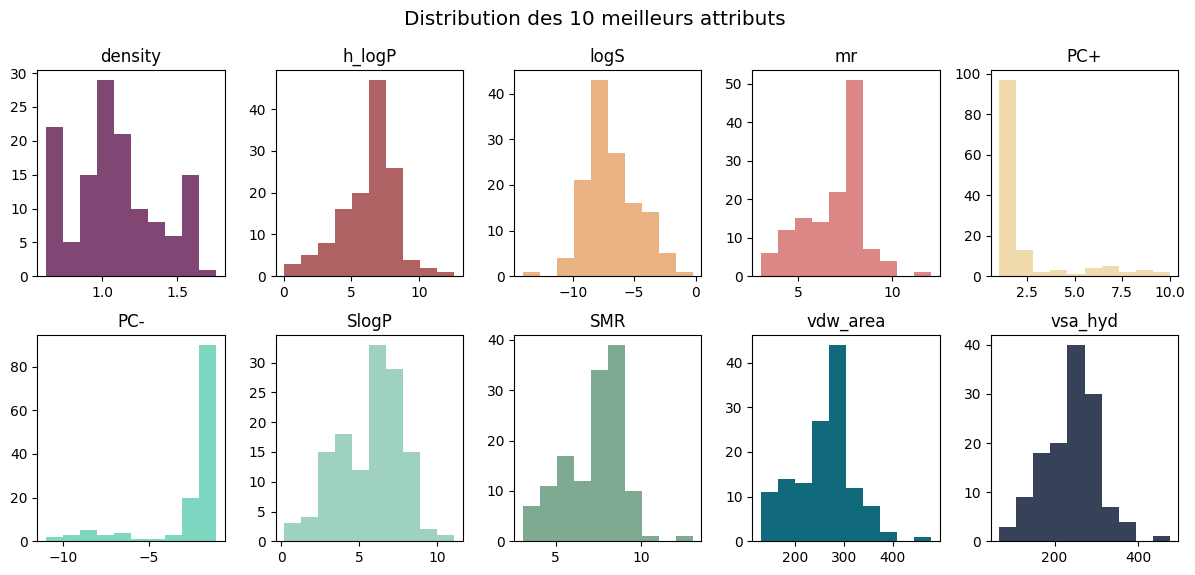

In [107]:

colors = ["#804674","#B06161","#E9B384","#DC8686","#F0DBAF","#7ED7C1","#9ED2BE","#7EAA92","#116A7B","#374259"]
fig = plt.figure(figsize=(12,6))
st = fig.suptitle("Distribution des 10 meilleurs attributs", fontsize="x-large")


for k in range(0,10):
    ax1 = fig.add_subplot(2,5,k+1)
    ax1.hist(df_BA[best_attribute[k]],color=colors[k])
    ax1.set_title(best_attribute[k])

fig.tight_layout()

st.set_y(0.95)
fig.subplots_adjust(top=0.85)

## **1.b - Réprésentation des données : relations de corrélation**

<Axes: >

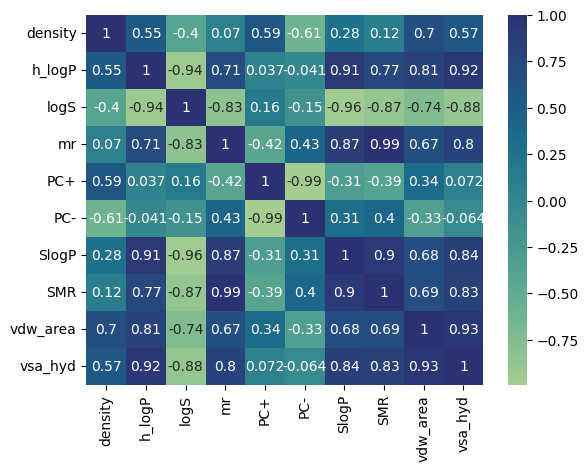

In [108]:
BA_corr = df_BA.corr()
sns.heatmap(BA_corr,annot=True,cmap="crest")

In [109]:
np.fill_diagonal(BA_corr.values, np.nan)
BA_corr_65 = np.abs(BA_corr.values) >= 0.65
BA_corr_85 = np.abs(BA_corr.values) >= 0.85
print(f"Proportion de coefficients supérieurs ou égaux à 0.65 : {int(BA_corr_65.sum()/2)}")
print(f"Proportion de coefficients supérieurs ou égaux à 0.85 : {int(BA_corr_85.sum()/2)}")

Proportion de coefficients supérieurs ou égaux à 0.65 : 23
Proportion de coefficients supérieurs ou égaux à 0.85 : 11


On peut observer que sur les 40 coefficients de corrélation (doublons et diagonale exclus) :
-  **17 coéfficients** soit **42.5% du total** ont leur valeur absolue ≥ 0.65 -> On considère ces attributs corrélés. 
- Parmi ceux-ci, **8 coéfficients** soit **20% du total** ont la valeur absolue ≥ 0.85 : On considère ces attributs très corrélés.

Au vu des taux de corrélation, on peut en déduire que l'application de l'ACP est **nécessaire** pour éviter toute redondance.


**Calcul de corrélation par classe** \
Nous allons produire cinq matrices de corrélation pour chaque classe, et les comparer.

In [110]:
# Création des dataframe pour chaque classe
df_Class_m2 = data.loc[data['Class'] == "Class -2"]
df_Class_m1 = data.loc[data['Class'] == "Class -1"]
df_Class_0 = data.loc[data['Class'] == "Class 0"]
df_Class_1 = data.loc[data['Class'] == "Class 1"]
df_Class_2 = data.loc[data['Class'] == "Class 2"]

# Conservation que des 10 meilleurs attributs
df_Class_m2 = df_Class_m2.filter(best_attribute)
df_Class_m1 = df_Class_m1.filter(best_attribute)
df_Class_0 = df_Class_0.filter(best_attribute)
df_Class_1 = df_Class_1.filter(best_attribute)
df_Class_2 = df_Class_2.filter(best_attribute)


In [111]:
# Matrice de corrélation de chaque classe
C2_corr = df_Class_2.corr()
C1_corr = df_Class_1.corr()
C0_corr = df_Class_0.corr()
Cm1_corr = df_Class_m1.corr()
Cm2_corr = df_Class_m2.corr()

Text(0.5, 1.0, 'Heatmap de Class -2')

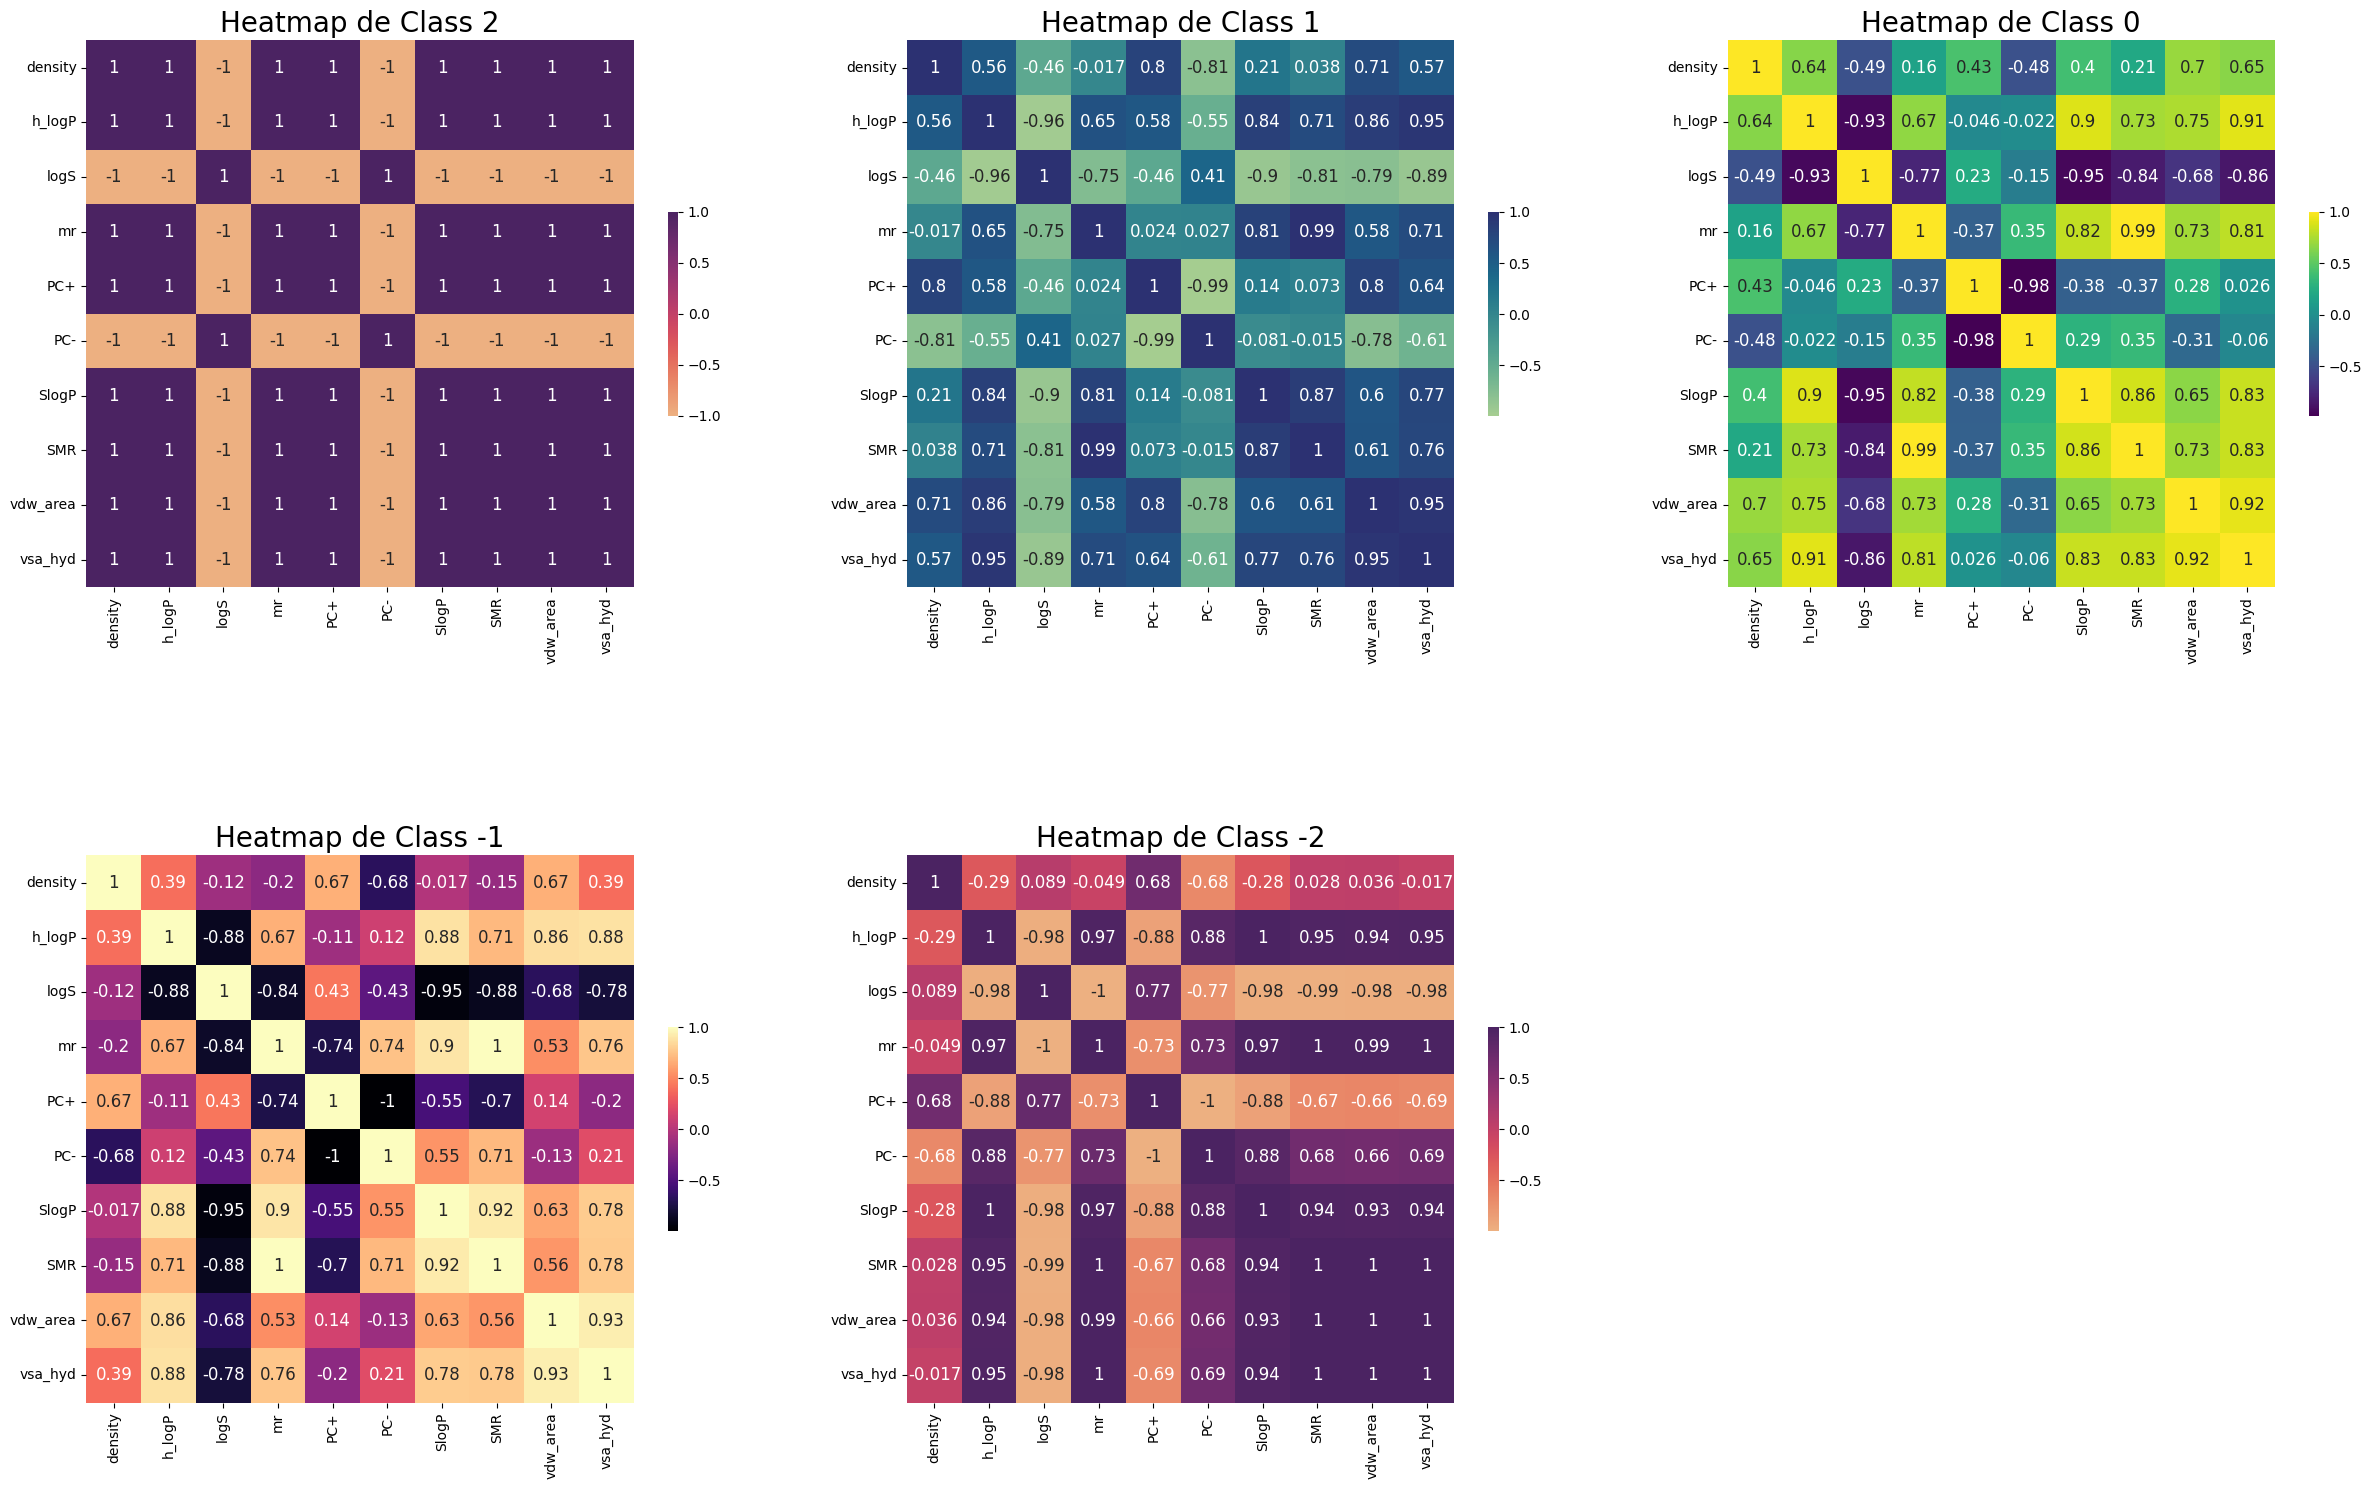

In [112]:
fig = plt.figure(figsize = (30,30)) # width x height
ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)

# We use ax parameter to tell seaborn which subplot to use for this plot
sns.heatmap(data=C2_corr, ax=ax1, cmap = "flare", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=C1_corr, ax=ax2, cmap = "crest", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=C0_corr, ax=ax3, cmap = "viridis", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=Cm1_corr, ax=ax4, cmap = "magma", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=Cm2_corr, ax=ax5, cmap = "flare", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})

ax1.set_title("Heatmap de Class 2",fontsize = 20)
ax2.set_title("Heatmap de Class 1",fontsize = 20)
ax3.set_title("Heatmap de Class 0",fontsize = 20)
ax4.set_title("Heatmap de Class -1",fontsize = 20)
ax5.set_title("Heatmap de Class -2",fontsize = 20)

Les relations de corrélation entre les 10 variables sont différentes pour chaque classe.

## **1.c - Réprésentation des données : Nombre optimal de composantes principales pour l'ACP**

Les données sont exprimées dans des unités différentes, nous allons donc procéder à une standardisation avant application de la transformation ACP.

In [113]:
# Standardisation données avant d'effectuer la transformation ACP car elles ne sont pas à la même échelle
sc = StandardScaler()
#transformation
standard_scaler = sc.fit_transform(data_no_class)

### **1.c.1. Visualisation de la transformation ACP pour 2 composantes principales**

In [114]:
# Transformation ACP pour deux composantes principales
pca2 = PCA(n_components=2)
CP2 = pca2.fit_transform(standard_scaler)
# Conservation de l'information dans un DataFrame
df_PCA2 = pd.DataFrame(data = CP2, columns = ['Composante principale 1',
                                                                  'Composante principale 2'])


In [115]:
fig = px.scatter(df_PCA2, x="Composante principale 1", y="Composante principale 2", color=data["Class"],
                 color_discrete_sequence=["#80558C","#AF7AB3","#CBA0AE","#E4D192","#EEA5A6"],
                 title = "<b>Transformation ACP pour 2 composantes principales</b>")
fig.update_layout(legend=dict(title="Classes"))
fig.show()

### **1.c.2. Visualisation de la transformation ACP pour 3 composantes principales**

In [116]:
# Transformation ACP pour trois composantes principales
pca3 = PCA(n_components = 3)
CP3 = pca3.fit_transform(standard_scaler)
# Conservation de l'information dans un DataFrame
df_PCA3 = pd.DataFrame(data = CP3, columns = ['Composante principale 1','Composante principale 2',
                                                                  'Composante principale 3'])


In [117]:
fig = px.scatter_3d(df_PCA3, x="Composante principale 1", y="Composante principale 2", z ="Composante principale 3", color=data['Class'],
                 color_discrete_sequence=["#354259","#576F72","#7D9D9C","#68A7AD","#E4DCCF"],opacity=0.8,
                 title = "<b>Transformation ACP pour 3 composantes principales</b>")
fig.update_layout(legend=dict(title="Classes"))
fig.show()

In [118]:
# On ajoute la colonne classe aux Dataframes des transformations ACP
df_PCA2 = pd.concat([df_PCA2,data['Class']],sort=False,axis=1)
df_PCA3 = pd.concat([df_PCA3,data['Class']],sort=False,axis=1)


Au lieu d'une standardisation, nous avions procédé en premier lieu à une normalisation, mais elle nous avait mené à des résultats pour les métriques de performance (voir partie ci-dessous) bien moins élevés.

### **1.c.3. Détermination des classes grâce aux centroïdes**

Dans cette partie, nous allons déterminer les distances aux centroïdes avec une adaptation pour la transformation ACP. Par la suite, pour la seconde partie sur la mesure de distance, nous avons utiliser d'autres méthodes, notamment car la manipulation de plusieurs types de distances sera nécessaire.

In [119]:
# Calcul des centroïdes
centroids_PCA2 = df_PCA2.groupby("Class").mean()
centroids_PCA3 = df_PCA3.groupby("Class").mean()

In [120]:
# Fonction pour calculer la distance euclidienne entre deux lignes
def euclidean(row_data1, row_data2):
    return ((row_data1 - row_data2) ** 2).sum() ** 0.5

La transformation en numpy.array de df_PCA2 et df_PCA3 est réalisée à cette étape et non avant l'ajout des colonnes classes car la fonction to_numpy() ne conserve pas nécessairement l'ordre du DataFrame. De cette manière, on peut conserver la classe attitrée par la transformation ACP.

In [121]:
# Liste des centroïdes
# Pour la liste des centroïdes de chaque classe on a :
# index 0 = class -1, index 1 = class -2, index 2 = class 0, index 3 = class 1, index 4 = class 2
centroids_PCA2_array = centroids_PCA2.to_numpy()
centroids_PCA3_array = centroids_PCA3.to_numpy()
# liste des coordonnées après transformation PCA + Classe
PCA2_array = df_PCA2.to_numpy()
PCA3_array = df_PCA3.to_numpy()

In [122]:
# Fonction euclidienne retourne une liste de longueur égale au nombre d'objets, composée d'une liste
# à cinq éléments correspondant à la distance aux cinq centroïdes
def euclidean_array(X,list_centroids):
    coord = np.delete(X,-1,1)
    res = []
    for k in range(len(coord)):
        dist_centroids = []
        for centroid in list_centroids:
            dist_centroids.append(euclidean(coord[k],centroid))
        res.append(dist_centroids)
    return res
    

In [123]:
# Liste des distances pour chaque objet avec chaque centroïde
dist_centroids_PCA2 = euclidean_array(PCA2_array,centroids_PCA2_array)
dist_centroids_PCA3 = euclidean_array(PCA3_array,centroids_PCA3_array)

In [124]:
# Fonction qui à un index retourne la classe associée
def index_to_class(index):
    dict_classes = {0:"Class -1",1:"Class -2",2:"Class 0",3:"Class 1",4:"Class 2"}
    # index 0 = class -1, index 1 = class -2, index 2 = class 0, index 3 = class 1, index 4 = class 2
    return dict_classes[index]

In [125]:
# Fonction qui prend en paramètre la liste des distances à chaque centroïde pour chaque objet
# et retourne la liste de classe associée
def class_of_object(dist_centroids):
    res = []
    for dist in dist_centroids:
        index  = np.argmin(dist)
        res.append(index_to_class(index))
    return res

In [126]:
# Classe associée à chaque objet selon la distance euclidienne pour PCA2
euclidean_class_PCA2 = class_of_object(dist_centroids_PCA2)
# Classe associée à chaque objet selon la distance euclidienne pour PCA3
euclidean_class_PCA3 = class_of_object(dist_centroids_PCA3)

#liste des classes selon la transformation PCA
PCA2_classes = np.delete(PCA2_array,[0,1],1).flatten()
PCA3_classes = np.delete(PCA3_array,[0,1,2],1).flatten()

Maintenant que nous possédons les classes associées à chaque objet (pour chacune des transformations ACP) selon le minimum de la distance euclidienne, nous allons calculer les matrices de confusion et déterminer la précision pour chacune d'entre elles.

Text(0.5, 1.0, 'Matrice de confusion pour la transformation ACP à 3 CP')

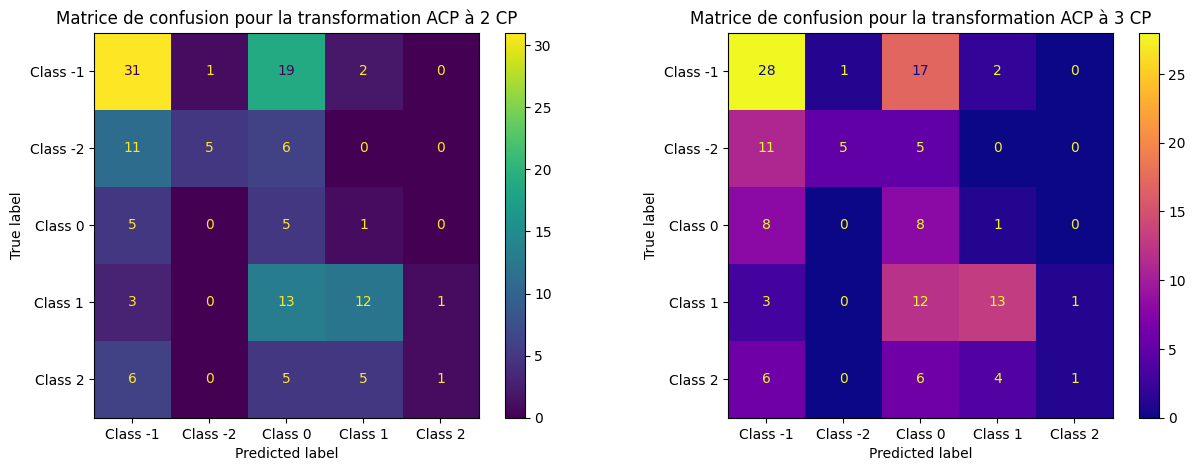

In [127]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
disp1 = metrics.ConfusionMatrixDisplay.from_predictions(euclidean_class_PCA2, PCA2_classes, ax=ax[0])
ax[0].set_title("Matrice de confusion pour la transformation ACP à 2 CP")
disp2 = metrics.ConfusionMatrixDisplay.from_predictions(euclidean_class_PCA3, PCA3_classes, ax=ax[1],cmap="plasma")
ax[1].set_title("Matrice de confusion pour la transformation ACP à 3 CP")


In [128]:

# Affichage des métriques de qualité
print("Métriques de performance de PCA2")
print(metrics.classification_report(PCA2_classes,euclidean_class_PCA2))

print("Métriques de performance de PCA3")
print(metrics.classification_report(PCA3_classes,euclidean_class_PCA3))

Métriques de performance de PCA2
              precision    recall  f1-score   support

    Class -1       0.58      0.55      0.57        56
    Class -2       0.23      0.83      0.36         6
     Class 0       0.45      0.10      0.17        48
     Class 1       0.41      0.60      0.49        20
     Class 2       0.06      0.50      0.11         2

    accuracy                           0.41       132
   macro avg       0.35      0.52      0.34       132
weighted avg       0.49      0.41      0.39       132

Métriques de performance de PCA3
              precision    recall  f1-score   support

    Class -1       0.58      0.50      0.54        56
    Class -2       0.24      0.83      0.37         6
     Class 0       0.47      0.17      0.25        48
     Class 1       0.45      0.65      0.53        20
     Class 2       0.06      0.50      0.11         2

    accuracy                           0.42       132
   macro avg       0.36      0.53      0.36       132
weighted av

On en déduit que le nombre optimal de composantes est 3, mais les valeurs d'Accuracy sont très proches, et en dessous de 50%. 

## **2.a - Mesures de distances : la distance la plus adéquate**

Après identifié des attributs fortement corrélés dans la question 1.b, nous devons déterminer la meilleure mesure de distance. Sans avoir envore de résultats, nous nous attendons à ce que la meilleure mesure soit celle de Mahalanobis. La distance de Mahalanobis est particulièrement adaptée lorsque les variables sont corrélées, car elle prend en compte la covariance entre les variables, ce qui peut aider à éviter les biais introduits par la corrélation.

In [129]:
# Reprise du dataframe avec les 10 meilleurs attributs
df_BA = data[best_attribute]
cov_matrix_BA = df_BA.cov()

In [130]:
cov_matrix_BA

,density,h_logP,logS,mr,PC+,PC-,SlogP,SMR,vdw_area,vsa_hyd
density,0.086576,0.333130,-0.251256,0.033888,0.349439,-0.410873,0.165145,0.061010,12.608828,10.590126
h_logP,0.333130,4.261869,-4.200535,2.407049,0.155865,-0.193213,3.796056,2.707200,103.486352,120.947507
logS,-0.251256,-4.200535,4.670017,-2.915492,0.698681,-0.769100,-4.177466,-3.239785,-98.001176,-120.319926
mr,0.033888,2.407049,-2.915492,2.672715,-1.377803,1.617923,2.869830,2.785075,67.233408,83.164238
PC+,0.349439,0.155865,0.698681,-1.377803,4.069597,-4.604078,-1.275739,-1.345419,42.194946,9.268578
PC-,-0.410873,-0.193213,-0.769100,1.617923,-4.604078,5.302541,1.422594,1.583307,-47.219719,-9.342742
SlogP,0.165145,3.796056,-4.177466,2.869830,-1.275739,1.422594,4.084779,3.131549,84.153064,108.467169
SMR,0.061010,2.707200,-3.239785,2.785075,-1.345419,1.583307,3.131549,2.938290,72.739910,90.307541
vdw_area,12.608828,103.486352,-98.001176,67.233408,42.194946,-47.219719,84.153064,72.739910,3796.198857,3656.876734
vsa_hyd,10.590126,120.947507,-120.319926,83.164238,9.268578,-9.342742,108.467169,90.307541,3656.876734,4038.061229


In [131]:
# On réassemble data pour avoir la colonne des classes associée
data = pd.concat([df_BA, data['Class']],axis=1)
data.head()

,density,h_logP,logS,mr,PC+,PC-,SlogP,SMR,vdw_area,vsa_hyd,Class
0,1.598682,10.113732,-9.36990,6.323788,9.979999,-10.980,6.9222,7.0426,399.21936,357.37701,Class 2
1,0.638040,2.931160,-3.26276,4.342181,1.200000,-1.200,2.8398,4.3948,136.57939,130.88504,Class 2
2,1.236138,10.476893,-11.15416,9.404722,1.770000,-1.770,9.8876,10.1978,345.43402,345.43402,Class -2
3,1.264930,5.372310,-7.35228,7.610351,2.380000,-2.380,5.0192,8.0415,271.13144,263.09042,Class -2
4,1.198143,9.794951,-10.41987,9.055549,1.743000,-1.743,9.2342,9.6968,327.85260,327.14081,Class -2


In [132]:
# Détermination des centroïdes pour chaque classes dans le DataFrame des 10 meilleurs attributs
classes = data.groupby('Class')
BA_centroides = (classes.mean())
BA_centroides

,density,h_logP,logS,mr,PC+,PC-,SlogP,SMR,vdw_area,vsa_hyd
Class,,,,,,,,,,
Class -1,1.123504,7.017384,-7.600044,7.357418,2.224786,-2.332054,6.458988,7.665053,267.295659,255.553409
Class -2,1.196891,8.698058,-9.594297,8.623217,1.840333,-1.840667,8.243500,9.189650,309.839035,306.952483
Class 0,1.054634,5.819543,-6.508018,7.096717,2.432812,-2.724479,5.480291,7.285585,259.908970,234.229161
Class 1,1.029410,4.425812,-4.761626,5.322663,3.257250,-3.557250,3.669918,5.460649,218.181748,187.216445
Class 2,1.118361,6.522446,-6.316330,5.332984,5.590000,-6.090000,4.881000,5.718700,267.899375,244.131025


In [133]:
# Fonction calculant la distance de Mahalanobis entre deux lignes
def mahalanobis(row_data1, row_data2, cov_matrix):
    diff = row_data1 - row_data2
    inv_cov_matrix = np.linalg.pinv(cov_matrix.values)  # Utiliser directement pinv sans convertir à DataFrame
    return np.sqrt(diff.dot(inv_cov_matrix).dot(diff.T))

In [134]:
# Fonction calculant la distance de Manhattan entre deux lignes
def manhattan(row_data1, row_data2):
    return abs(row_data1 - row_data2).sum()

In [135]:
# Fonction retournant la classe du centroide le plus proche selon une fonction de distance
def centroid(row_index,df_row,distance_function,df_centroids,cov_matrix):
    min_distance = float('inf')
    closest_centroid_class = None
    # Ligne associée à l'index donné en paramètre
    row_data = df_row.iloc[row_index]

    # Parcourt de la liste des centroïdes
    for centroid_class, centroid_data in df_centroids.iterrows():
        # Dans le cas de la distance de mahalanobis, on veut une matrice de covariance
        if distance_function == mahalanobis:
            distance = mahalanobis(row_data1=row_data, row_data2=centroid_data,cov_matrix=cov_matrix)
        else:
            distance = distance_function(row_data, centroid_data)

        # On ne récupère que la plus petite distance
        if distance < min_distance:
            min_distance = distance
            closest_centroid_class = centroid_class 
    return closest_centroid_class

In [136]:
# Retourne la liste des classes d'un dataframe donné en paramètre calculées selon une mesure
# method = {kNN_neighboor,centroid,distance_mesure}
def calculate_predictions(method,distance_function,df_centroids,data,cm,df_y=None):
    # Liste qui contiendra les classes prédites
    predictions = []
    for k in range(data.shape[0]):
        if method == centroid:
            predictions.append(centroid(k,data,distance_function,df_centroids,cov_matrix=cm))
            
        else:
            predictions.append(method(k,distance_function,data,cm,df_y))
    return np.array(predictions)

Pour le parcours de l'objet *prediction* qui contiendra les résultats, nous avons préféré utiliser une liste au lieu d'un numpy array, car les numpy array sont plutôt construits pour des opérations d'ensemble sur tous leurs éléments plutôt qu'une itération, qui dans certains cas peut être plus lente que celle sur les éléments d'une liste. Ce n'est qu'une fois qu'elle a été construite que nous l'avons retourné en tant que numpy array.

In [137]:
# Calcul des predictions des centroïdes pour les trois types de distance
centroid_euclidean = calculate_predictions(method=centroid,distance_function = euclidean,df_centroids = BA_centroides,
                       data = df_BA,cm = cov_matrix_BA)
centroid_manhattan = calculate_predictions(method=centroid,distance_function = manhattan,df_centroids = BA_centroides,
                       data = df_BA,cm = cov_matrix_BA)
centroid_mahalanobis = calculate_predictions(method=centroid,distance_function = mahalanobis,df_centroids = BA_centroides,
                      data = df_BA,cm = cov_matrix_BA)

# Récupération des véritables classes
true_classes_BA = data["Class"].to_numpy()

# Calcul de l'accuracy
accuracy_E = metrics.classification_report(true_classes_BA,centroid_euclidean,output_dict=True)['accuracy']
accuracy_Mt = metrics.classification_report(true_classes_BA,centroid_manhattan,output_dict=True)['accuracy']
accuracy_Mb = metrics.classification_report(true_classes_BA,centroid_mahalanobis,output_dict=True)['accuracy']

print(f"Euclidean Accuracy : {accuracy_E*100:.2f}%")
print(f"Manhattan Accuracy : {accuracy_Mt*100:.2f}%")
print(f"Mahalanobis Accuracy : {accuracy_Mb*100:.2f}%")

Euclidean Accuracy : 37.12%
Manhattan Accuracy : 37.88%
Mahalanobis Accuracy : 62.88%


Nous avons choisi la métrique **accuracy** car elle permet de calculer la performance d'une classification, en comptant le nombre de vrai positifs et vrai négatifs (Accuracy = TP + TN / (TP + TN + FP + FN))

On peut remarquer que la meilleure distance pour la classification est la distance de Mahalanobis, avec un taux d'accuracy de 70,45%. Cela est dû au fait que la distance de Mahalanobis est une généralisation de la distance euclidienne, qui prend en compte la corrélation entre les attributs. La distance de Mahalanobis est donc plus adaptée pour nos données multivariées.

## **2.b - Mesure de distance : matrice de covariance**

- Dans le cas de l'analyse des objets avec une mesure de distance de Mahalanobis, **il est recommandé d'utiliser une matrice de covariance pour toutes les données plutôt que des matrices de covariance par classe**. 

- *En utilisant une seule matrice de covariance pour toutes les données, on prend en compte l'ensemble des variations et des corrélations entre les variables, ce qui peut fournir une meilleure représentation globale de la structure des données et des relations entre les objets.*

## **3.a - Choix du modèle de classification : Meilleure mesure de distance**

La représentation retenue au point 1 était d'appliquer une ACP avec 3 composantes principales, et la distance retenue au point 2 était la distance de Mahalanobis.

In [138]:
# On divise les données en ensembles d'entrainement et de test puis on retire les classes,
# cela est plus pratique pour le calcul des centroides dans la suite

# stratify = y permet d'obtenir la même proportion de classes dans les données d'entraînement et de test
X_train_class, X_test_class, y_train, y_test = train_test_split(df_PCA3, df_PCA3["Class"], test_size=0.2,stratify=y)
X_train, X_test = X_train_class.drop(columns=["Class"]),X_test_class.drop(columns=["Class"])

cov_Xtrain = X_train.cov()


**Mesure de distance avec les k plus proches voisins**

In [139]:
# Fonction retournant les index des 5 voisins les plus proches
def kNN_indexes(array_dist):
    # Variable contenant le résultat
    res_indexes = np.zeros(5,dtype=int)
    for k in range(res_indexes.shape[0]):
        # On détermine l'index du minimum de array_dist en ignorant la valeur NaN
        k_min = np.nanargmin(array_dist)
        res_indexes[k] = int(k_min)
        # On affecte la valeur Nan pour que la distance ne soit plus considérée à la prochaine itération
        array_dist[k_min] = float("NaN")
    return res_indexes


In [140]:
# Retourne le mode de la Classe parmi les cinq voisins
# Grâce à la liste des distances et des index des voisins
def find_mode_class(list_indexes,df=y_train):
    # Dictionnaire qui contiendra les distances associées à chaque classes pour les cinq voisins
    classes = {"Class -2":0,"Class -1":0,"Class 0":0,"Class 1":0,"Class 2":0}
    for k in range(list_indexes.shape[0]):
        ind = int(list_indexes[k])
        find_class = df.iloc[ind]
        classes[find_class] += 1
    
    return max(classes, key=classes.get)

In [141]:

# Retourne la classe calculée d'après la distance pondérée des 5 plus proches voisins
# en prenant en paramètre l'index de la ligne dont on veut déterminer la classe
def kNN_neighboor(row_index,distance_function,data,cm,df_y=y_train):
    # Tableau retenant les mesures de distances
    dist = np.zeros((data.shape[0]))
    # Récupération de la ligne associée à l'index
    x_vector = data.iloc[row_index]
    # Calcul de la liste des distances de mahalnobis
    for i in range(data.shape[0]):
        if distance_function == mahalanobis:
            dist[i] = (distance_function(x_vector,data.iloc[i],cm))
    
    # On affecte la valeur "Nan" à la distance de l'objet avec lui même
    # Pour éviter qu'il soit compris dans ses propres voisins
    dist[row_index] = float("NaN")
    # Liste des index des 5 voisins
    kNN_d = kNN_indexes(dist)
    res_class = find_mode_class(kNN_d,df_y)
    return res_class

**Résultats de comparaison entre les centroïdes et les kNN voisins**

In [142]:
centroids_xtrain = (X_train_class.groupby("Class")).mean()
centroid_predict = calculate_predictions(method=centroid,distance_function = mahalanobis,df_centroids = centroids_xtrain,
                      data = X_train,cm = cov_Xtrain)
kNN_predict = calculate_predictions(method = kNN_neighboor,distance_function = mahalanobis,df_centroids=None,
                      data = X_train,cm = cov_Xtrain,df_y=y_train)

In [143]:
# Résultats de différentes métriques
print("Qualité de la méthode centroïde")
print(metrics.classification_report(y_train,centroid_predict,zero_division=1.0))
print("Qualité de la méthode kNN")
print(metrics.classification_report(y_train,kNN_predict,zero_division=1.0))

Qualité de la méthode centroïde
              precision    recall  f1-score   support

    Class -1       0.67      0.55      0.60        44
    Class -2       0.21      0.80      0.33         5
     Class 0       0.69      0.29      0.41        38
     Class 1       0.50      0.62      0.56        16
     Class 2       0.07      0.50      0.12         2

    accuracy                           0.48       105
   macro avg       0.43      0.55      0.40       105
weighted avg       0.62      0.48      0.50       105

Qualité de la méthode kNN
              precision    recall  f1-score   support

    Class -1       0.66      0.84      0.74        44
    Class -2       0.00      0.00      0.00         5
     Class 0       0.66      0.55      0.60        38
     Class 1       0.43      0.38      0.40        16
     Class 2       1.00      0.00      0.00         2

    accuracy                           0.61       105
   macro avg       0.55      0.35      0.35       105
weighted avg       

Ainsi, le modèle des k plus proches voisins semble le plus adapté puisque ses résultats sont meilleurs que le modèle du plus proche centroïde, avec son niveau d'accuracy de 57% contre 44% pour la méthode centroïde.

## **3.b - Choix du modèle de classification : Mélange de distribution Gaussiennes**

On fait l’hypothèse que les objets correspondent à des mélanges de distributions gaus- siennes correspondant aux classes.

L'objectif est de déterminer si cette hypothèse est vraissemblable en appliquant une classification par modèle de mélange gaussien ("Gaussian Mixture Model") aux données.

Dans un premier temps, on adapte nos données au format requis par le fichier model.py.

In [144]:
seed = 42
np.random.seed(seed)

# On encode les étiquettes pour qu'elles soient numériques et compréhensibles par les modèles
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [145]:
X_ = df_PCA3.drop('Class',axis=1).values
y_ = y_encoded

Ensuite, on récupère le code du fichier model.py, pour lequel on précise un nombre de classes égal à 5.

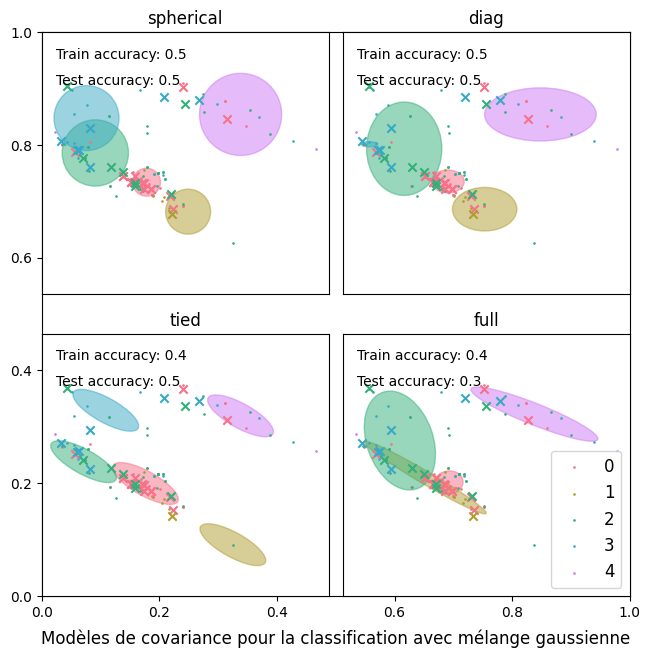

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X_,y_,test_size=0.25,random_state=0)

colors = sns.color_palette("husl",5)

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = patches.Ellipse(gmm.means_[n, :2], v[0], v[1], angle= angle + 180, 
                              color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

n_classes = 5

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=100, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.title("Modèle de classification par melange gaussien selon la covariance",y=-0.1)
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])
    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = X_[y_ == n]
        plt.scatter(data[:, 0], data[:, 1], s = 0.8, color=color,
                    label=n)
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred==y_train)#
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred==y_test)
    
    #np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))
plt.show()

La justesse est la plus élevée pour une option de covariance "diag", ce qui laisse penser que l'hypothèse selon laquelle les objets correspondent à des mélanges de distributions gaussiennes correspondant aux classes peut être pertinente.

## **4 - Application**

Les études précédentes ont permis de mettre en évidence que le modèle le plus approprié afin de classifier nos données est le KNN avec K = 5.

Nous allons donc appliquer ce modèle aux données du fichier test_TP1.csv

In [147]:
# Import des données nettoyées
data_file = "../Datasets/test_TP1.xlsx"
# Stockage des données dans un dataframe
data_to_predict = pd.read_excel(data_file,index_col=0).drop(columns=["Class"])
data_to_predict

,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,a_nF,a_nH,balabanJ,bpol,CASA+,CASA-,chi0,chi0v,chi0v_C,chi0_C,chi1,chi1v,chi1v_C,chi1_C,DASA,DCASA,dens,density,diameter,dipole,h_logP,h_logS,logP(o/w),logS,mr,npr2,PC+,PC-,PEOE_VSA_NEG,PEOE_VSA_PNEG,PEOE_VSA_POL,PEOE_VSA_PPOS,petitjean,petitjeanSC,pmi,pmi2,pmi3,radius,rgyr,RPC-,rsynth,SlogP,SMR,std_dim1,std_dim2,std_dim3,TPSA,VAdjEq,VAdjMa,VDistEq,VDistMa,vdw_area,vdw_vol,vol,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
SMILES,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Clc1c(Cl)c2c(oc3c2cc(Cl)c(Cl)c3)cc1Cl,34.822380,91.950394,357.86932,21,0,18,15,32.854588,12,5,0,3,1.829249,7.295621,148.49989,577.95892,13.024580,12.309766,6.232051,7.317473,8.486071,6.725033,3.482051,4.782823,265.91891,429.45905,1.389469,1.062521,8,0.49669,6.749979,-6.840410,6.671,-8.34834,7.486103,0.823092,1.615,-1.615,162.66840,2.503756,2.503756,0,0.375000,0.6,4795.1274,3946.8301,4795.1265,5,3.753121,0.173375,0,6.8530,7.87700,2.837996,1.583892,0.001568,13.140000,0.539216,5.321928,2.771987,8.067125,243.90721,143.59483,245.000,262.13361,0.000000,222.35103,0.000000,0.171541,0.372073,-4.843119,-0.190411,340.41998,102
Clc1c(Cl)c(Cl)cc(c1Cl)-c1c(Cl)c(Cl)c([O-])c(Cl)c1,38.515587,65.726738,456.87869,22,0,20,18,33.436462,12,7,0,2,2.187551,6.084414,101.15345,1160.01500,15.187716,14.500203,6.154701,7.187716,9.251796,7.577452,3.404701,4.632993,391.15195,1058.86160,1.460856,1.140834,9,4.60019,7.654610,-8.003391,7.881,-8.84979,8.370783,0.977702,1.539,-2.539,253.60887,13.566921,13.566921,0,0.444444,0.8,5775.2544,4872.1069,4983.2222,5,3.751676,0.326506,0,8.0712,8.70805,2.818089,1.246926,1.189445,23.059999,0.484648,5.392317,2.900468,8.381889,298.19495,149.19763,280.875,306.71164,13.566921,274.74591,13.566921,7.191214,15.597743,-203.029548,-7.982248,410.31799,106


On a vu dans les questions précédentes que les classes étaient davantage séparées lorsque l'on appliquait aux données une transormation PCA. Pour appliquer une telle transformation, on commence par normaliserles données

In [148]:
# on normalise les données avant d'effectuer la transformation PCA
sc = StandardScaler()
#transformation
data_to_predict_normalized = sc.fit_transform(data_to_predict)

Nous avons vu au cours de la question 1c que les transformations PCA avec 2 et 3 composantes principales conservaient a peu prés les même informations. On choisit donc d'appliquer la transformation PCA avec 2 composantes principales puisque le nombre d'échantillons dont nous devons prédire la classe ne nous permet pas d'appliquer directement PCA avec 3 composantes principales. Nous allons cependant tenter de réaliser cela dans la suite.

In [149]:
# Transformation ACP pour deux composantes principales
pca2 = PCA(n_components=2)
data_to_predict_after_pca2= pca2.fit_transform(data_to_predict_normalized)
# Conservation de l'information dans un DataFrame
df_test_TP1_PCA2 = pd.DataFrame(data=data_to_predict_after_pca2, columns=['Composante principale 1',
                                          'Composante principale 2'])
df_PCA_class_PCA2 = df_PCA2["Class"]
df_PCA_no_class_PCA2 = df_PCA2.drop(columns=["Class"])

# concaténation des donées dont on cherche la classe et des résultats du PCA2
df_ensemble_PCA2 = pd.concat([df_test_TP1_PCA2,df_PCA_no_class_PCA2])
cov_ensemble_PCA2 = df_ensemble_PCA2.cov()

On ne peut pas exactement utiliser la fonction calculate_predictions, on pour cette partie, on va donc adapter les autres fonctions définies à cette sous partie.

In [150]:
# Mode = PCA2 ou PCA3
def class_testTP1_PCA(mode_PCA,df_test_TP1,df_PCA_class,df_PCA_no_class,cov):
    kNN_indexes_test_PCA = []
    neighboor_classes_of_test = [] 
    if mode_PCA == "PCA2":
        dist_test_PCA = [[],[]]
    else:
        dist_test_PCA = [[],[],[]]

    # Calcul des distances de mahalnobis pour les deux objets de test_P1
    for k in range(df_test_TP1.shape[0]):
        for j in range(df_PCA_no_class.shape[0]):
            dist = mahalanobis(df_test_TP1.iloc[k],df_PCA_no_class.iloc[j],cov)
            dist_test_PCA[k].append(dist)
        kNN_indexes_test_PCA.append(kNN_indexes(dist_test_PCA[k]))
        neighboor_classes_of_test.append(find_mode_class(kNN_indexes_test_PCA[k],df=df_PCA_class))

    return neighboor_classes_of_test

In [151]:
neighboor_classes_of_test_PCA2 = class_testTP1_PCA("PCA2",df_test_TP1_PCA2,df_PCA_class_PCA2,df_PCA_no_class_PCA2,cov_ensemble_PCA2)


In [152]:
print(f"La classe de l'objet 0 de test_TP1.xlsx avec le PCA2 est {neighboor_classes_of_test_PCA2[0]}")
print(f"La classe de l'objet 1 de test_TP1.xlsx avec le PCA2 est {neighboor_classes_of_test_PCA2[1]}")


La classe de l'objet 0 de test_TP1.xlsx avec le PCA2 est Class 0
La classe de l'objet 1 de test_TP1.xlsx avec le PCA2 est Class 0


Les classes associées aux 2 données sont les mêmes, ces échantillons appartiendrait tout deux à la classe 0. Les calculs de justesse effectués à la question 3a quant au modèle permettent de plus d'affirmer que cette prédiction est juste dans environ 57% des cas.

Par soucis de complétude et dans l'objectif de vérifier nos résultats, nous conservons le même modèle mais effectuons une transformation PCA avec 3 composantes principales. Afin d'effectuer une telle transformation, il est nécessaire d'ajouter une donnée aléatoire issue de l'ensmeble des données dont on connaît la classe (donc de clean_QSAR_dataset) à celles dont on veut prédire la classe.

In [153]:
sample = data_no_class.sample()
sample

,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,a_nF,a_nH,balabanJ,bpol,CASA+,CASA-,chi0,chi0v,chi0v_C,chi0_C,chi1,chi1v,chi1v_C,chi1_C,DASA,DCASA,dens,density,diameter,dipole,h_logP,h_logS,logP(o/w),logS,mr,npr2,PC+,PC-,PEOE_VSA_NEG,PEOE_VSA_PNEG,PEOE_VSA_POL,PEOE_VSA_PPOS,petitjean,petitjeanSC,pmi,pmi2,pmi3,radius,rgyr,RPC-,rsynth,SlogP,SMR,std_dim1,std_dim2,std_dim3,TPSA,VAdjEq,VAdjMa,VDistEq,VDistMa,vdw_area,vdw_vol,vol,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
56,40.505966,84.042198,483.42615,23,0,18.0,17,37.803093,12,0,0,5,1.896701,13.832035,123.62608,710.63641,13.284093,16.614805,6.386751,7.576986,8.469235,8.710885,3.392734,4.765986,399.38394,587.01038,1.808458,1.413696,10,0.301659,7.781011,-7.6226,7.611,-8.61954,8.912082,0.816052,1.471,-1.47,281.90253,2.503756,2.503756,0.0,0.5,1.0,10025.264,7664.4082,9392.0635,5,4.213495,0.112245,0.055556,7.2914,9.1458,2.988802,1.403962,0.951636,9.229999,0.521503,5.247928,3.039615,8.036353,331.40753,143.047085,312.25,334.20535,0.0,325.34479,0.0,4.503148,9.767328,-127.13738,-4.998494,564.69098,92


In [154]:
data_to_predict = np.vstack([data_to_predict, sample])
data_to_predict_normalized = sc.fit_transform(data_to_predict)

Appliquons la transformations PCA avec 3 composantes :

In [155]:
# Transformation ACP pour trois composantes principales
pca3 = PCA(n_components=3)
data_to_predict_after_pca3= pca3.fit_transform(data_to_predict_normalized)
# Conservation de l'information dans un DataFrame
df_test_TP1_PCA3 = pd.DataFrame(data=data_to_predict_after_pca3, columns=['Composante principale 1',
                                          'Composante principale 2','Composante principale 3'])
df_PCA_class_PCA3 = df_PCA3["Class"]
df_PCA_no_class_PCA3 = df_PCA3.drop(columns=["Class"])

# concaténation des donées dont on cherche la classe et des résultats du PCA2
df_ensemble_PCA3 = pd.concat([df_test_TP1_PCA3,df_PCA_no_class_PCA3])
cov_ensemble_PCA3 = df_ensemble_PCA3.cov()

In [156]:
neighboor_classes_of_test_PCA3 = class_testTP1_PCA("PCA3",df_test_TP1_PCA3,df_PCA_class_PCA3,df_PCA_no_class_PCA3,cov_ensemble_PCA3)

In [157]:
print(f"La classe de l'objet 0 de test_TP1.xlsx est {neighboor_classes_of_test_PCA3[0]}")
print(f"La classe de l'objet 1 de test_TP1.xlsx est {neighboor_classes_of_test_PCA3[1]}")
print(f"La classe de l'objet 2 de test_TP1.xlsx est {neighboor_classes_of_test_PCA3[2]}")

La classe de l'objet 0 de test_TP1.xlsx est Class 0
La classe de l'objet 1 de test_TP1.xlsx est Class 0
La classe de l'objet 2 de test_TP1.xlsx est Class -1


On a retrouvé les mêmes résultats avec les deux PCA, les deux objets de test_TP1.xlslx portant les même classes. Ce qui en soit confirme le peu de différence pour les précisions entre ces deux méthodes à la question 1.c.

## **Conclusion**

À travers ces différents algorithmes et calculs pour trouver la meilleure méthode de classification pour déterminer les classes de molécules parmi cinq choix (Class -2, Class -1, Class 0, Class 1, Class 2), on peut retenir les points suivants :
- Les **dix meilleurs attributs** de la classe à retenir sont : **['density', 'h_logP', 'logS', 'mr', 'PC+', 'PC-', 'SlogP', 'SMR', 'vdw_area', 'vsa_hyd']**;
- La **meilleure mesure** de distance est celle de **mahalanobis**;
- Le **nombre optimal de composantes principales** pour la transformation ACP est **3**;
- La **meilleure méthode de classification** est celle des **k plus proches voisins** (avec k=5)

Ces résultats dépendent des choix de prétraitement que nous avons appliqué pour le nettoyage des données au dataset de base.

***

### **Références**

1. https://stefvanbuuren.name/fimd/sec-MCAR.html
2. https://medium.com/analytics-vidhya/different-types-of-missing-data-59c87c046bf7
3. https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values
4. https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
5. https://www.linkedin.com/advice/3/what-most-effective-distance-metrics-optimizing-xndwc
6. https://medium.com/@Kavya2099/optimizing-performance-selectkbest-for-efficient-feature-selection-in-machine-learning-3b635905ed48#:~:text=SelectKBest%20is%20a%20type%20of,score%20and%20rank%20the%20features.